In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import logging
import cv2

In [ ]:
patient_data = pd.read_csv("/content/HAM10000_metadata")

In [ ]:
patient_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
def make_list(image_id):
  number = int(image_id.replace('ISIC_00', ''))
  return number
patient_data['number'] = patient_data['image_id'].apply(make_list) 

In [ ]:
patient_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,number
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,27419
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,25030
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,26769
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,25661
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,31633
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,33084
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,33550
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,33536
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,32854


In [ ]:
sorted_patient_data = patient_data.sort_values(by='number')
sorted_patient_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,number
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,vidir_molemax,24306
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,vidir_molemax,24307
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,vidir_molemax,24308
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,vidir_molemax,24309
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,vidir_modern,24310
...,...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,vidir_modern,34316
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,vidir_modern,34317
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,vidir_modern,34318
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,vidir_modern,34319


In [ ]:
sorted_patient_data['dx'].unique()

array(['nv', 'mel', 'bkl', 'df', 'akiec', 'bcc', 'vasc'], dtype=object)

In [ ]:
sorted_patient_data['nv'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'nv' else 0)
sorted_patient_data['mel'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'mel' else 0)
sorted_patient_data['bkl'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'bkl' else 0)
sorted_patient_data['df'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'df' else 0)
sorted_patient_data['akiec'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'akiec' else 0)
sorted_patient_data['bcc'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'bcc' else 0)
sorted_patient_data['vasc'] = sorted_patient_data['dx'].apply(lambda x: 1 if x == 'vasc' else 0)

In [ ]:
sorted_patient_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,number,nv,mel,bkl,df,akiec,bcc,vasc
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,vidir_molemax,24306,1,0,0,0,0,0,0
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,vidir_molemax,24307,1,0,0,0,0,0,0
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,vidir_molemax,24308,1,0,0,0,0,0,0
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,vidir_molemax,24309,1,0,0,0,0,0,0
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,vidir_modern,24310,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,vidir_modern,34316,0,1,0,0,0,0,0
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,vidir_modern,34317,0,1,0,0,0,0,0
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,vidir_modern,34318,0,0,1,0,0,0,0
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,vidir_modern,34319,1,0,0,0,0,0,0


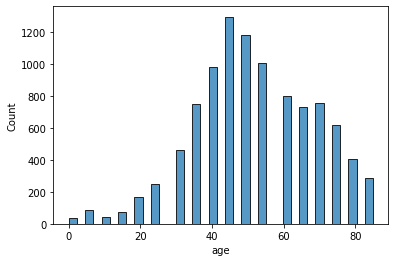

In [ ]:
sns.histplot(data=sorted_patient_data, x = 'age')

In [ ]:
labels_names = sorted_patient_data['dx'].unique()

In [ ]:
labels_names

array(['nv', 'mel', 'bkl', 'df', 'akiec', 'bcc', 'vasc'], dtype=object)

In [ ]:
def make_labels(dx):
  if dx == 'nv':
    return 0
  elif dx == 'mel':
    return 1
  elif dx == 'bkl':
    return 2
  elif dx == 'df':
    return 3 
  elif dx == 'akiec':
    return 4
  elif dx == 'bcc':
    return 5
  elif dx == 'vasc':
    return 6
sorted_patient_data['labels'] = sorted_patient_data['dx'].apply(make_labels)

In [ ]:
sorted_patient_data

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,number,nv,mel,bkl,df,akiec,bcc,vasc,labels
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,vidir_molemax,24306,1,0,0,0,0,0,0,0
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,vidir_molemax,24307,1,0,0,0,0,0,0,0
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,vidir_molemax,24308,1,0,0,0,0,0,0,0
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,vidir_molemax,24309,1,0,0,0,0,0,0,0
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,vidir_modern,24310,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,vidir_modern,34316,0,1,0,0,0,0,0,1
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,vidir_modern,34317,0,1,0,0,0,0,0,1
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,vidir_modern,34318,0,0,1,0,0,0,0,2
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,vidir_modern,34319,1,0,0,0,0,0,0,0


In [ ]:
sorted_patient_data.head(50)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,number,nv,mel,bkl,df,akiec,bcc,vasc,labels
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,vidir_molemax,24306,1,0,0,0,0,0,0,0
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,vidir_molemax,24307,1,0,0,0,0,0,0,0
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,vidir_molemax,24308,1,0,0,0,0,0,0,0
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,vidir_molemax,24309,1,0,0,0,0,0,0,0
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,vidir_modern,24310,0,1,0,0,0,0,0,1
4497,HAM_0000981,ISIC_0024311,nv,follow_up,75.0,female,back,vidir_molemax,24311,1,0,0,0,0,0,0,0
700,HAM_0001359,ISIC_0024312,bkl,histo,75.0,male,lower extremity,rosendahl,24312,0,0,1,0,0,0,0,2
2130,HAM_0002869,ISIC_0024313,mel,histo,50.0,female,back,rosendahl,24313,0,1,0,0,0,0,0,1
6803,HAM_0002198,ISIC_0024314,nv,histo,75.0,male,lower extremity,vidir_modern,24314,1,0,0,0,0,0,0,0
1327,HAM_0007538,ISIC_0024315,mel,histo,55.0,male,trunk,vidir_modern,24315,0,1,0,0,0,0,0,1


In [ ]:
train_labels = sorted_patient_data['labels'].tolist()

In [ ]:
train_labels = train_labels[0:5010]
len(train_labels)

5010

In [ ]:
train_labels = np.array(train_labels, dtype='int32')
np.save('list', train_labels)

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_data_gen = train_image_generator.flow_from_directory(
                                                          directory='/content/drive/MyDrive/data_skin',
                                                          class_mode = 'binary',
                                                          target_size=(256, 256),
                                                          shuffle = True,
                                                          batch_size = 100
                                                          )

Found 5000 images belonging to 7 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

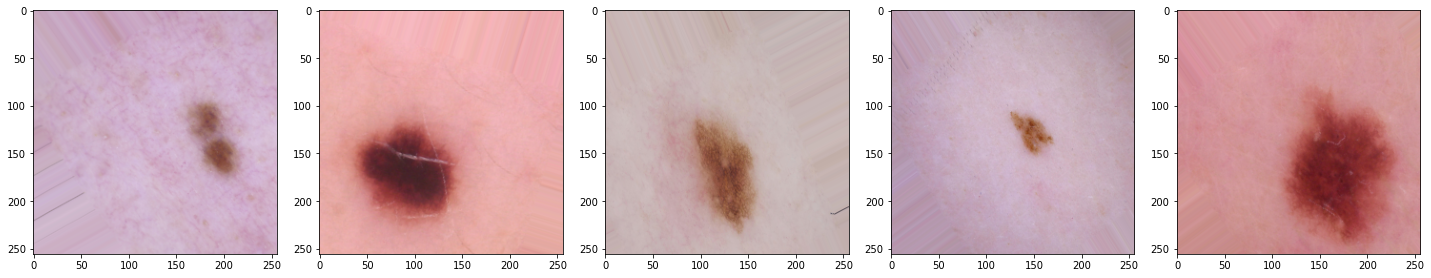

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
plotImages(sample_training_images[:5])

In [ ]:
sample_training_images[1].shape

(256, 256, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(7, activation='softmax')
])
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=5*1000,
  decay_rate=1,
  staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       7

In [ ]:
model.fit_generator(train_data_gen, epochs=50, steps_per_epoch=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
5/5 [==============================] - 121s 21s/step - loss: 5.4140 - accuracy: 0.3600
Epoch 2/50
5/5 [==============================] - 111s 20s/step - loss: 2.1152 - accuracy: 0.6700
Epoch 3/50
5/5 [==============================] - 106s 19s/step - loss: 1.8412 - accuracy: 0.6660
Epoch 4/50
5/5 [==============================] - 99s 17s/step - loss: 1.6951 - accuracy: 0.7040
Epoch 5/50
5/5 [==============================] - 91s 16s/step - loss: 1.8292 - accuracy: 0.6300
Epoch 6/50
5/5 [==============================] - 87s 15s/step - loss: 1.6538 - accuracy: 0.6760
Epoch 7/50
5/5 [==============================] - 83s 15s/step - loss: 1.4977 - accuracy: 0.7140
Epoch 8/50
5/5 [==============================] - 82s 14s/step - loss: 1.5271 - accuracy: 0.6980
Epoch 9/50
5/5 [==============================] - 78s 14s/step - loss: 1.5386 - accuracy: 0.6700
Epoch 10/50
5/5 [==============================] - 81s 14s/step - loss: 1.3951 - accuracy: 0.7100
Epoch 11/50
5/5 [=========

In [ ]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_data_gen = test_image_generator.flow_from_directory(
                                                          directory='/content/drive/MyDrive/test_skin',
                                                          class_mode = None,
                                                          target_size=(256, 256),
                                                          shuffle = True,
                                                          )

Found 5015 images belonging to 1 classes.


In [ ]:
answers = model.predict_generator(test_data_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
test_list = []
for ans in answers:
  test_list.append(np.argmax(ans))


In [ ]:
set(test_)

{5}